<font color='red'>Question:</font> What is deep learning?

In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Deep learning is a subset of machine learning, which is essentially a neural network with three or more layers. These neural networks attempt to simulate the behavior of the human brain—albeit far from matching its ability—allowing it to “learn” from large amounts of data. While a neural network with a single layer can still make approximate predictions, additional hidden layers can help to optimize and refine for accuracy.

In [ ]:
!pip install tensorflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 462 kB 5.3 MB/s 


<font color='red'>Question:</font> What is TensorFlow? What is Keras?

TensorFlow is an end-to-end open source platform for machine learning. It has a comprehensive, flexible ecosystem of tools, libraries and community resources that lets researchers push the state-of-the-art in ML and developers easily build and deploy ML powered applications.
TensorFlow is a free and open-source software library for machine learning and artificial intelligence. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks.

TensorFlow provides a collection of workflows to develop and train models using Python or JavaScript, and to easily deploy in the cloud, on-prem, in the browser, or on-device no matter what language you use. The tf. data API enables you to build complex input pipelines from simple, reusable pieces.

Keras is an open-source software library that provides a Python interface for artificial neural networks. Keras acts as an interface for the TensorFlow library.

In [ ]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils


In [ ]:
from keras.datasets import mnist
 
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


<font color='red'>Question:</font> What is in mnist data? What is the sample size of train and test?

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

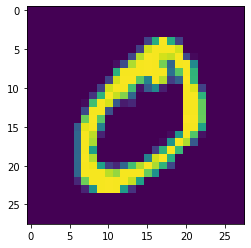

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(X_train[1])

### Processing train and test data

In [ ]:
### data normalization
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(type(X_train))

<class 'numpy.ndarray'>


In [ ]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

### Build a deep learning model

In [ ]:
# deep learning CNN model
model = Sequential()
model.add(Convolution2D(6, (3, 3), activation='relu', input_shape=X_train.shape[1:], data_format='channels_first'))
print(model.output_shape)

model.add(MaxPooling2D(pool_size=(2,2), data_format='channels_first'))
print(model.output_shape)

model.add(Dropout(0.25))
print(model.output_shape)

model.add(Convolution2D(16, (3, 3), activation='relu', data_format='channels_first'))
print(model.output_shape)

model.add(MaxPooling2D(pool_size=(2,2), data_format='channels_first'))
print(model.output_shape)

model.add(Dropout(0.25))
print(model.output_shape)

model.add(Flatten())
print(model.output_shape)

model.add(Dense(128, activation='relu'))
print(model.output_shape)

model.add(Dropout(0.5))
print(model.output_shape)

model.add(Dense(10, activation='softmax'))
print(model.output_shape)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

(None, 6, 26, 26)
(None, 6, 13, 13)
(None, 6, 13, 13)
(None, 16, 11, 11)
(None, 16, 5, 5)
(None, 16, 5, 5)
(None, 400)
(None, 128)
(None, 128)
(None, 10)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 6, 26, 26)         60        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 13, 13)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 6, 13, 13)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 11, 11)        880       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 5, 5)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 5, 5)          0

<font color='red'>Question:</font> What are **Convolution2D, MaxPooling2D, Dropout, Dense**?


This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. If use_bias is True, a bias vector is created and added to the outputs. Finally, if activation is not None, it is applied to the outputs as well.


Keras Conv2D is a 2D Convolution Layer, this layer creates a convolution kernel that is wind with layers input which helps produce a tensor of outputs.

Kernel: In image processing kernel is a convolution matrix or masks which can be used for blurring, sharpening, embossing, edge detection, and more by doing a convolution between a kernel and an image.

**Max pooling** is a pooling operation that selects the maximum element from the region of the feature map covered by the filter. Thus, the output after max-pooling layer would be a feature map containing the most prominent features of the previous feature map.

**Dense Layer** is simple layer of neurons in which each neuron receives input from all the neurons of previous layer, thus called as dense. Dense Layer is used to classify image based on output from convolutional layers.

<font color='red'>Question:</font> What is **"Activation"**?

The activation function defines the output of a neuron / node given an input or set of input (output of multiple neurons). It’s the mimic of the stimulation of a biological neuron.

The output of the activation function to the next layer (in shallow neural network: input layer and output layer, and in deep network to the next hidden layer) is called forward propagation (information propagation). It’s considered as a non linearity transformation of a neural network.

The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.

Note that the Dropout layer only applies when training is set to True such that no values are dropped during inference. When using model.fit, training will be appropriately set to True automatically, and in other contexts, you can set the kwarg explicitly to True when calling the layer

Max Pooling: It is nothing but selecting maximum value from the matrix of specified size(default size is 2 X 2). This method is helpful to extract features with high importance or which are high-lighted in the image.

<font color='red'>Question:</font> What are the other options for **"optimizer"** and **"loss"**?

An optimizer is a function or an algorithm that modifies the attributes of the neural network, such as weights and learning rate. Thus, it helps in reducing the overall loss and improve the accuracy.

Gradient Descent

Stochastic Gradient Descent

Stochastic Gradient descent with momentum

Mini-Batch Gradient Descent

Adagrad

RMSProp

AdaDelta

Adam

Cross-entropy loss is often simply referred to as “cross-entropy,” “logarithmic loss,” “logistic loss,” or “log loss” for short.

Each predicted probability is compared to the actual class output value (0 or 1) and a score is calculated that penalizes the probability based on the distance from the expected value. The penalty is logarithmic, offering a small score for small differences (0.1 or 0.2) and enormous score for a large difference (0.9 or 1.0).

Loss functions in deep learning:

Regression Loss Function.

Mean Squared Error.

Mean Squared Logarithmic Error Loss.

Mean Absolute Error Loss.

Binary Classification Loss Function.

Binary Cross Entropy Loss.

Hinge Loss.

Multi-Class Classification Loss Function.

### Train the model

In [ ]:
history_callback = model.fit(X_train, Y_train, batch_size=32, epochs=5, verbose=1)

Epoch 1/5


InvalidArgumentError: ignored

<font color='red'>Question:</font> What are **"batch_size"** and **"epochs"**?

The batch size defines the number of samples that will be propagated through the network.

For instance, let's say you have 1050 training samples and you want to set up a batch_size equal to 100. The algorithm takes the first 100 samples (from 1st to 100th) from the training dataset and trains the network. Next, it takes the second 100 samples (from 101st to 200th) and trains the network again. We can keep doing this procedure until we have propagated all samples through of the network. Problem might happen with the last set of samples. In our example, we've used 1050 which is not divisible by 100 without remainder. The simplest solution is just to get the final 50 samples and train the network.

Advantages of using a batch size < number of all samples:

It requires less memory. Since you train the network using fewer samples, the overall training procedure requires less memory. That's especially important if you are not able to fit the whole dataset in your machine's memory.

Typically networks train faster with mini-batches. That's because we update the weights after each propagation. In our example we've propagated 11 batches (10 of them had 100 samples and 1 had 50 samples) and after each of them we've updated our network's parameters. If we used all samples during propagation we would make only 1 update for the network's parameter.




**batch mode:** where the batch size is equal to the total dataset thus making the iteration and epoch values equivalent
**mini-batch mode**: where the batch size is greater than one but less than the total dataset size. Usually, a number that can be divided into the total dataset size.
**stochastic mode**: where the batch size is equal to one. Therefore the gradient and the neural network parameters are updated after each sample.


### Model evaluation and prediction

In [ ]:
model.evaluate(X_train, Y_train, verbose=0)


In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
score

In [ ]:
model.metrics_names

In [ ]:
pd.DataFrame(history_callback.history).plot(marker='*')

In [ ]:
model.predict_classes(X_test)

<font color='red'>Question:</font> What information is in **"history_callback.history"**? What does the above graph tell us?

Every time any of the fit methods are used – as a result the special callback called History Callback is returned. It has a field history which is a dictionary of all metrics registered after every epoch. So to get list of loss function values after every epoch you can easly do:

In neural networks, the best idea for debugging is to see the relationship between the cost and the number of iterations. This not only ensures that the optimizer is working properly but can also be very useful in the indication of overfitting. It is also possible to debug the learning rate based on this relationship. Therefore, it is necessary to keep track of the loss and the accuracy metrics while training a neural network.

Keras automatically keeps record of all the events for each epoch. This includes loss and accuracy metrics for the training and the validation sets(if used). This is done using the History callback which is automatically applied to every Keras model.This callback records all the events into a History object that gets returned by the fit() method.